In [4]:
import pandas as pd

benin = pd.read_csv("../data/benin-malanville_clean.csv")
sierra = pd.read_csv("../data/sierraleone-bumbuna_clean.csv")
togo = pd.read_csv("../data/togo-dapaong_qc_clean.csv")

benin['Country'] = 'Benin'
sierra['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

all_df = pd.concat([benin, sierra, togo], ignore_index=True)

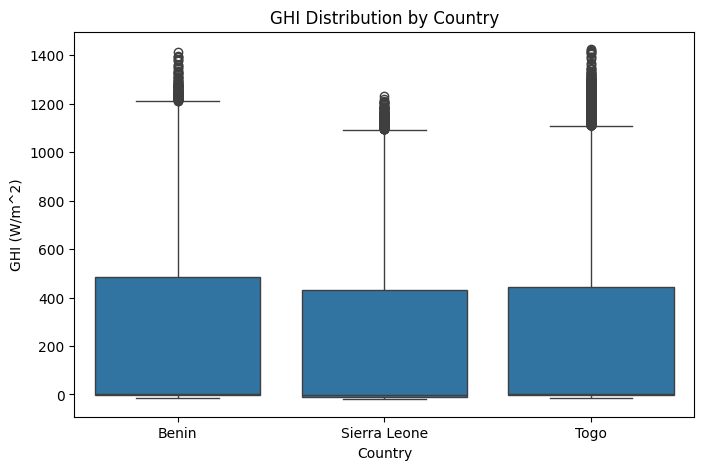

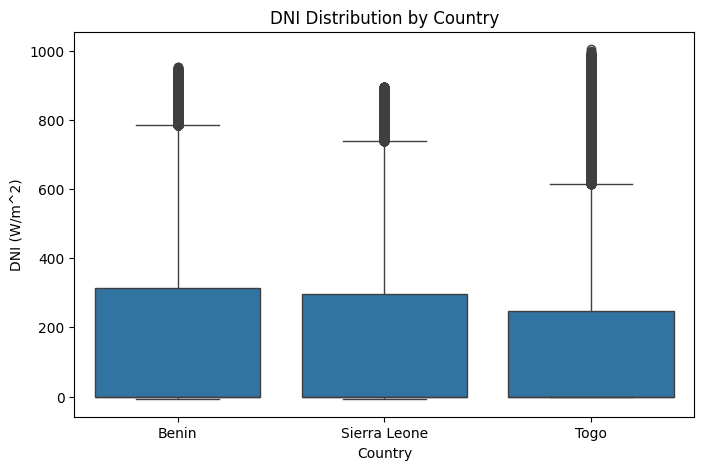

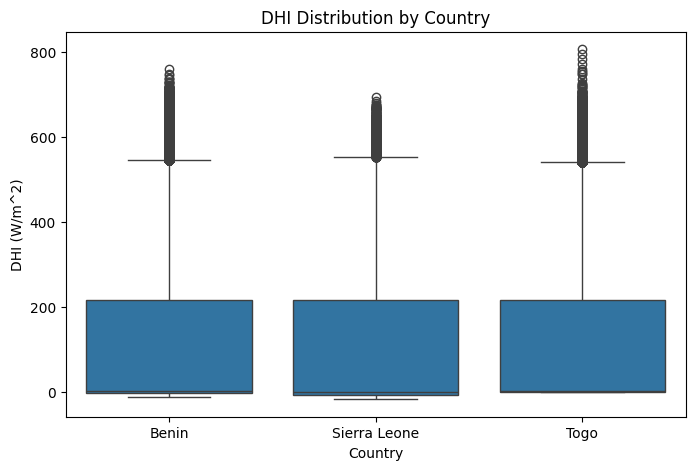

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

for metric in ['GHI', 'DNI', 'DHI']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Country', y=metric, data=all_df)
    plt.title(f"{metric} Distribution by Country")
    plt.ylabel(f"{metric} (W/m^2)")
    plt.show()

In [6]:
summary = all_df.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
summary.columns = ['_'.join(col) for col in summary.columns]
summary.reset_index(inplace=True)
summary

,Country,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
0,Benin,240.559452,1.8,331.131327,167.187516,-0.1,261.710501,115.358961,1.6,158.691074
1,Sierra Leone,216.652939,-0.8,310.779119,151.750296,-0.1,234.647858,103.549879,-0.8,144.494021
2,Togo,230.555040,2.1,322.532347,151.258469,0.0,250.956962,116.444352,2.5,156.520714


In [7]:
from scipy.stats import f_oneway, kruskal

# Drop NaNs for fair testing
ghi_benin = benin['GHI'].dropna()
ghi_sierra = sierra['GHI'].dropna()
ghi_togo = togo['GHI'].dropna()

anova_result = f_oneway(ghi_benin, ghi_sierra, ghi_togo)
print("One-way ANOVA p-value:", anova_result.pvalue)

# Optional: Kruskal-Wallis (non-parametric)
kruskal_result = kruskal(ghi_benin, ghi_sierra, ghi_togo)
print("Kruskal-Wallis p-value:", kruskal_result.pvalue)

One-way ANOVA p-value: 4.2021884327059684e-216
Kruskal-Wallis p-value: 0.0


C:\Users\abnet\AppData\Local\Temp\ipykernel_20552\992290912.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette="Blues_d")


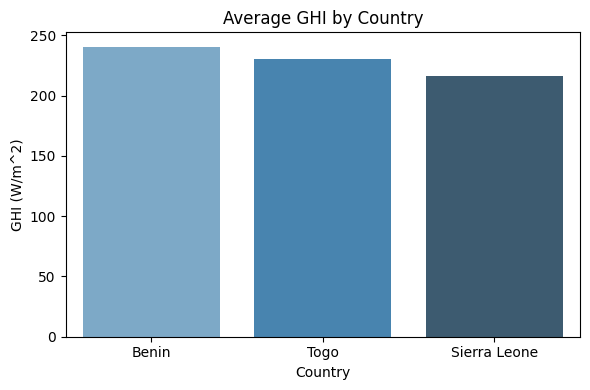

In [8]:
avg_ghi = all_df.groupby("Country")["GHI"].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette="Blues_d")
plt.title("Average GHI by Country")
plt.ylabel("GHI (W/m^2)")
plt.xlabel("Country")
plt.tight_layout()
plt.show()